In [ ]:
!pip install scikit-learn==1.1.3

In [1]:
!pip show pandas
!pip install --force-reinstall numpy==1.25.2

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
#print(boston_dataset.DESCR)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
#Load the data and divide into X and Y varaiable
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

boston_pd.head()


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2

In [7]:
# input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]



In [8]:
X

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.25,random_state=43)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((379, 13), (379,), (127, 13), (127,))

In [10]:
x_train

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
193   0.02187  60.0   2.93   0.0  0.401  6.800    9.9  6.2196   1.0  265.0   
405  67.92080   0.0  18.10   0.0  0.693  5.683  100.0  1.4254  24.0  666.0   
177   0.05425   0.0   4.05   0.0  0.510  6.315   73.4  3.3175   5.0  296.0   
191   0.06911  45.0   3.44   0.0  0.437  6.739   30.8  6.4798   5.0  398.0   
471   4.03841   0.0  18.10   0.0  0.532  6.229   90.7  3.0993  24.0  666.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
277   0.06127  40.0   6.41   1.0  0.447  6.826   27.6  4.8628   4.0  254.0   
305   0.05479  33.0   2.18   0.0  0.472  6.616   58.1  3.3700   7.0  222.0   
255   0.03548  80.0   3.64   0.0  0.392  5.876   19.1  9.2203   1.0  315.0   
320   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0  287.0   
324   0.34109   0.0   7.38   0.0  0.493  6.415   40.1  4.7211   5.0  287.0   

     PTRATIO       B  LSTAT  
193     15.6  393.37   5.03  
405     20.2  384.97  22.98  
177     16.6  395.60   6.29  
191     15.2  389.71   4.69  
471     20.2  395.33  12.87  
..       ...     ...    ...  
277     17.6  393.45   4.16  
305     18.4  393.36   8.93  
255     16.4  395.18   9.25  
320     19.6  396.90   7.20  
324     19.6  396.90   6.12  

[379 rows x 13 columns]

In [11]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corrsponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)


Mean squared Error on test set :  26.273991426429124
    Columns  Coefficient Estimate
0      CRIM             -0.064175
1        ZN              0.043297
2     INDUS              0.012350
3      CHAS              2.750516
4       NOX            -16.651616
5        RM              3.945449
6       AGE              0.014129
7       DIS             -1.298018
8       RAD              0.325159
9       TAX             -0.013027
10  PTRATIO             -0.977874
11        B              0.010125
12    LSTAT             -0.611482


In [12]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,lreg_y_pred))

print(r2_score(y_test,lreg_y_pred))


26.273991426429124
0.688195537717411


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

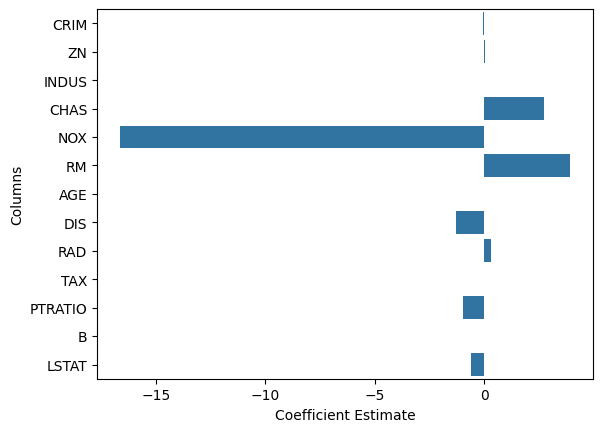

In [13]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [14]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 0.1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


26.3359971671088
    Columns  Coefficient Estimate
0      CRIM             -0.063182
1        ZN              0.043557
2     INDUS              0.006841
3      CHAS              2.721934
4       NOX            -15.259178
5        RM              3.948632
6       AGE              0.012975
7       DIS             -1.277536
8       RAD              0.323661
9       TAX             -0.013207
10  PTRATIO             -0.964377
11        B              0.010258
12    LSTAT             -0.613965


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

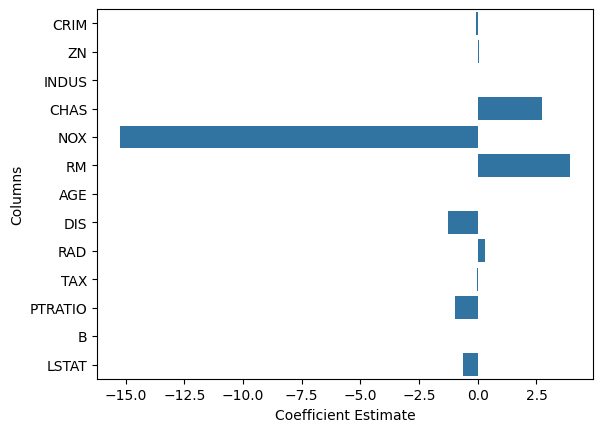

In [15]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

#### # import Lasso regression from sklearn library



In [16]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 28.353374194025225
    Columns  Coefficient Estimate
0      CRIM             -0.051033
1        ZN              0.047624
2     INDUS             -0.028958
3      CHAS              0.793708
4       NOX             -0.000000
5        RM              3.739527
6       AGE              0.005409
7       DIS             -1.000260
8       RAD              0.318317
9       TAX             -0.016107
10  PTRATIO             -0.836221
11        B              0.011686
12    LSTAT             -0.671397


In [17]:
r2_score(y_pred1,y_test)

0.6554240774577977

In [18]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)

<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

In [19]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = .6,l1_ratio=.5)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff


Mean Squared Error on test set 31.116897495276078


Columns  Coefficient Estimate
0      CRIM             -0.058234
1        ZN              0.055830
2     INDUS             -0.027188
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.455768
6       AGE              0.030335
7       DIS             -0.803421
8       RAD              0.373553
9       TAX             -0.018348
10  PTRATIO             -0.862695
11        B              0.010429
12    LSTAT             -0.840519

<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

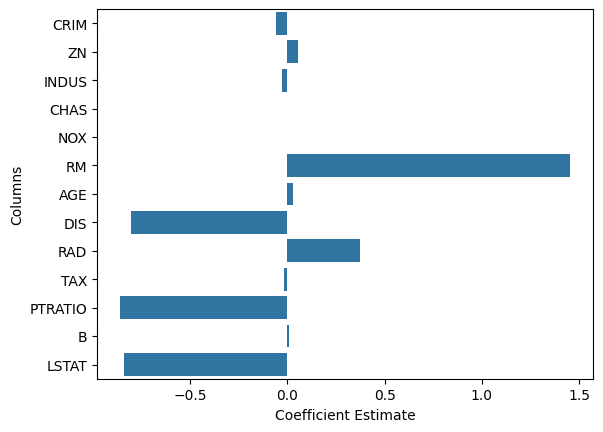

In [20]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=e_net_coeff)

In [21]:
# calculate the prediction and mean square error
y_tpred_elastic = e_net.predict(x_train)
mean_squared_error = np.mean((y_tpred_elastic - y_train)**2)

In [22]:
mean_squared_error

24.116235773971706

In [23]:
r2_score(y_train,y_tpred_elastic)

0.7123434091532319